In [2]:
import numpy as np #operações matemátcas
import matplotlib.pyplot as plt #plot de gráficos
import pandas as pd # manipulação de arquivos (csv, txt)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor

import joblib

from sklearn.preprocessing import MinMaxScaler

In [4]:
titulos_coleta = np.array([
    "erro_posicao",
    "x_p",
    "theta",
    "theta_p",
    "acao"
])

dataframe = pd.read_csv(
                        'dados/dados_ss.csv', 
                        header = None,
                        names = titulos_coleta)

In [69]:
dataframe

,erro_posicao,x_p,theta,theta_p,acao
0,0.512692,0.189492,0.007386,-0.198240,15.812472
1,0.510797,0.222517,0.005403,-0.246690,3.390488
2,0.508572,0.176029,0.002936,-0.176165,-4.761062
3,0.506811,0.102884,0.001175,-0.066016,-7.495233
4,0.505782,0.044660,0.000515,0.021493,-5.967153
...,...,...,...,...,...
9198,-0.106034,-0.197487,-0.003429,0.326614,-1.676997
9199,-0.104059,-0.119261,-0.000163,0.208772,8.015664
9200,-0.102866,-0.018587,0.001924,0.057737,10.319001
9201,-0.102680,0.061383,0.002502,-0.061935,8.198301


In [5]:
entradas = dataframe.iloc[:, :4]
saida = dataframe.iloc[:, 4]

In [71]:
entradas

,erro_posicao,x_p,theta,theta_p
0,0.512692,0.189492,0.007386,-0.198240
1,0.510797,0.222517,0.005403,-0.246690
2,0.508572,0.176029,0.002936,-0.176165
3,0.506811,0.102884,0.001175,-0.066016
4,0.505782,0.044660,0.000515,0.021493
...,...,...,...,...
9198,-0.106034,-0.197487,-0.003429,0.326614
9199,-0.104059,-0.119261,-0.000163,0.208772
9200,-0.102866,-0.018587,0.001924,0.057737
9201,-0.102680,0.061383,0.002502,-0.061935


In [72]:
saida

0       15.812472
1        3.390488
2       -4.761062
3       -7.495233
4       -5.967153
          ...    
9198    -1.676997
9199     8.015664
9200    10.319001
9201     8.198301
9202     7.084818
Name: acao, Length: 9203, dtype: float64

In [6]:
entradas_train, entradas_test, saida_train, saida_test = train_test_split(entradas, saida, test_size = 0.33)

In [10]:
import mkl

8

In [10]:
# mkl.set_num_threads(8)
modelo = MLPRegressor(
    hidden_layer_sizes = [64, 64, 64, 64], 
    activation='relu', 
    max_iter = 1000,
)

modelo.fit(entradas_train, saida_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=[64, 64, 64, 64], max_iter=1000)

In [11]:
saida_pred = modelo.predict(entradas_test)
erro = mean_squared_error(saida_test, saida_pred)

print("O erro medio quadratico é:  %.2f" % (erro))

O erro medio quadratico é:  41615.21


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [12]:
medidaR2 = r2_score(saida_test, saida_pred)
print("A medida R2 é: %.2f" % (medidaR2))

A medida R2 é: 0.74


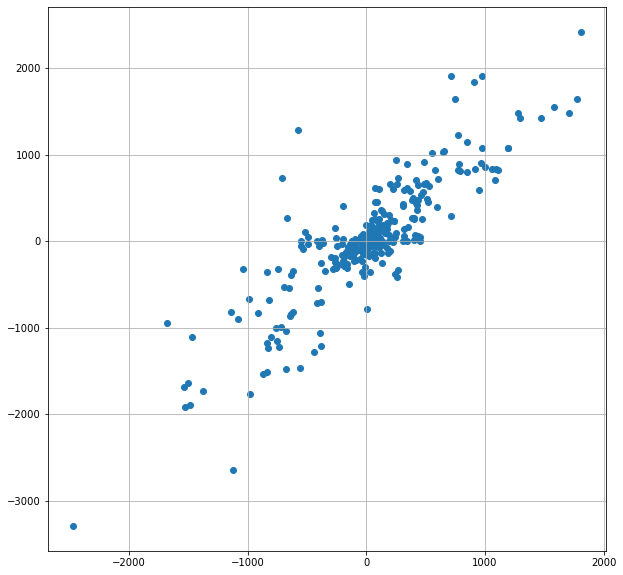

In [13]:
plt.figure(1, figsize=(10, 10))

plt.scatter(saida_pred, saida_test)
plt.grid()
plt.show()

In [15]:
arquivo = "treinamento4"
joblib.dump(modelo, arquivo)

['treinamento4']

In [16]:
modelo_carregado = joblib.load(arquivo)
saida_pred_ = modelo_carregado.predict(entradas_test)

result = modelo_carregado.score(entradas_test, saida_test)

print(result)

0.7442460384652912


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [80]:
entradas_test

,erro_posicao,x_p,theta,theta_p
8899,1.521734,0.027153,0.001083,-0.001077
3281,0.028015,-0.003853,0.000473,-0.004707
8247,0.005016,-0.098637,-0.001560,0.157030
581,0.204702,-0.363468,-0.005774,0.562334
6368,0.173946,0.029319,0.001121,-0.009016
...,...,...,...,...
6185,0.201109,0.007219,0.000804,0.005307
1727,0.388437,-1.765644,0.016682,2.433772
1636,1.627573,-0.966615,-0.030435,0.984513
4918,0.078948,0.644920,0.009486,-0.841527


In [81]:
import datetime

In [84]:
dtm = datetime.datetime.now()
print(dtm)

2022-07-06 01:55:04.464079


In [85]:
import pathlib

In [92]:
n_arq = 0
for path in pathlib.Path("modelos").iterdir():
    if path.is_file():
        n_arq += 1

print(n_arq+1)

identificador_arquivo = (n_arq+1)

arquivo = "tr" + identificador_arquivo

3


TypeError: can only concatenate str (not "int") to str

In [1]:
import tensorflow

: 

: 